                                                        Lab | Random variable distributions

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


1- Use the numerical variables from our dataset this week.

In [2]:
numerical_df = pd.read_csv('numerical.csv')
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9124,23405.987980,71941,73,18,89,0,2,198.234764
9125,3096.511217,21604,79,14,28,0,1,379.200000
9126,8163.890428,0,85,9,37,3,2,790.784983
9127,7524.442436,21941,96,34,3,0,3,691.200000


2- Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

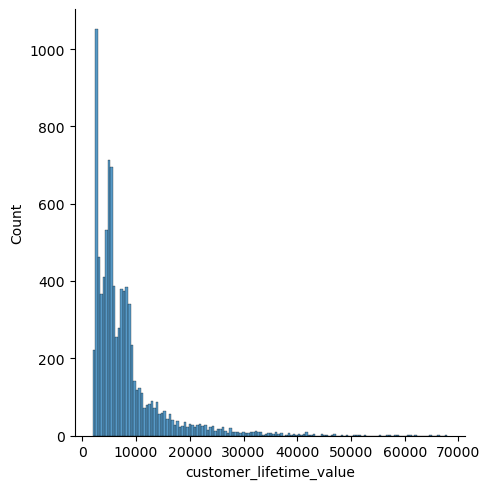

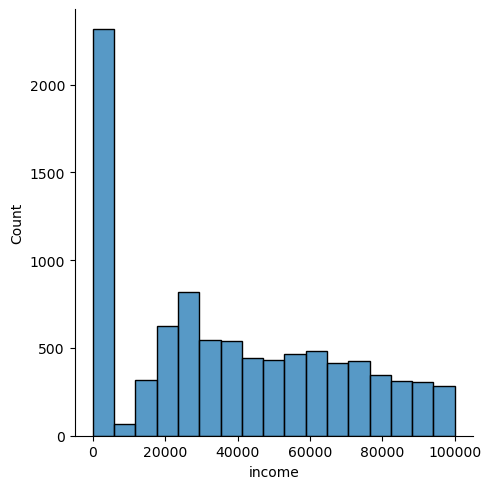

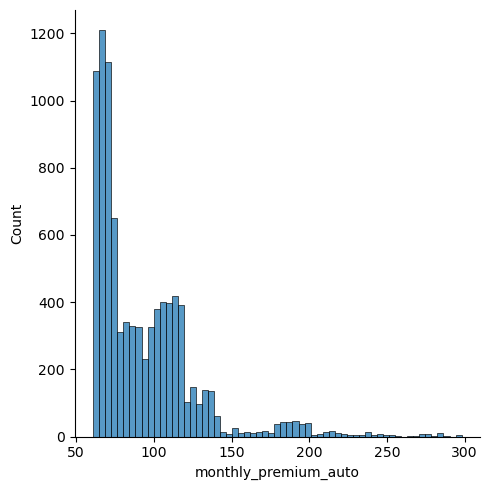

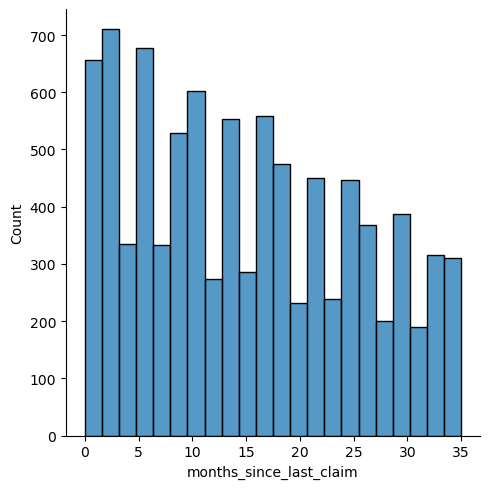

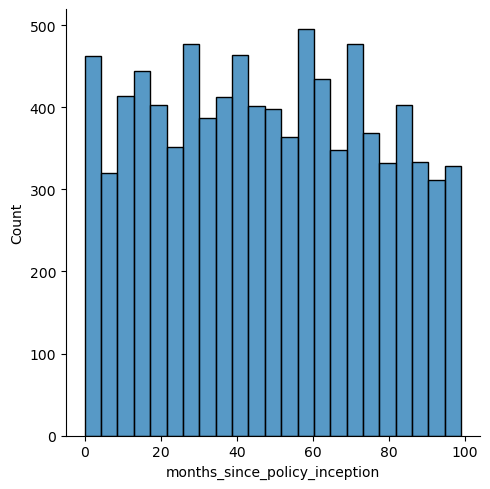

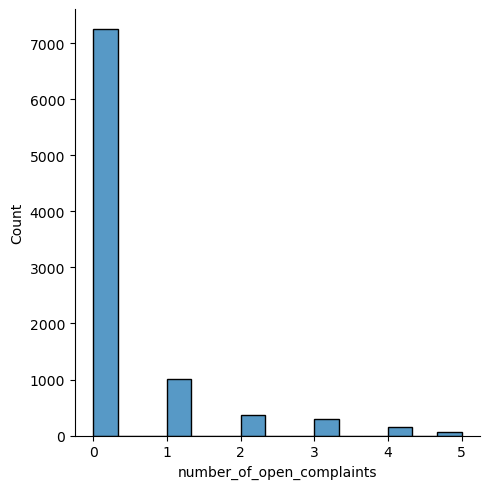

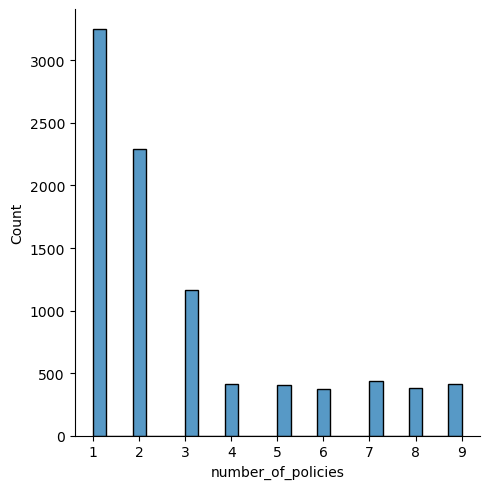

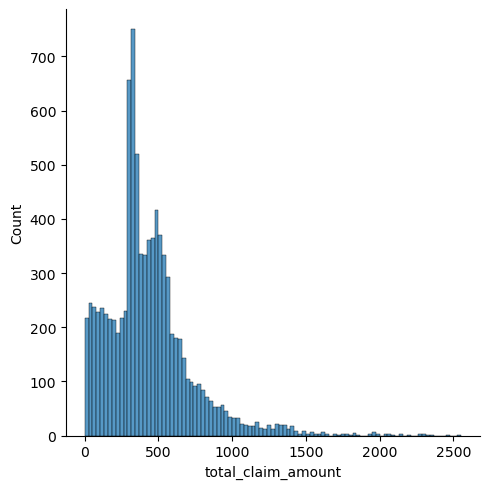

In [3]:
for columns in numerical_df.columns:
    sns.displot(numerical_df[columns])
    plt.show()

#the plot don't really fit a normal distribution

3- Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

C:\Users\nolwe\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


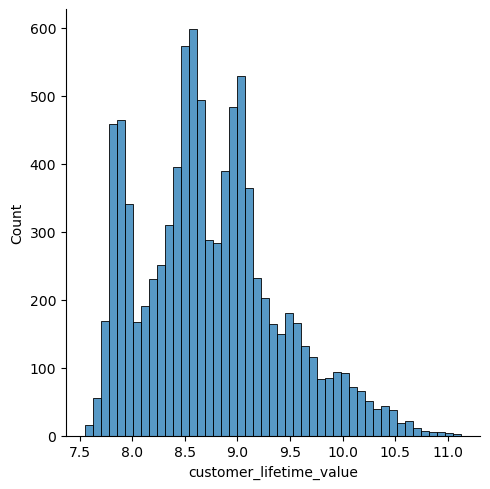

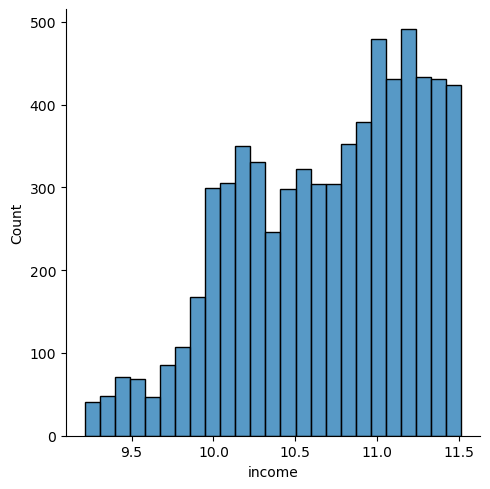

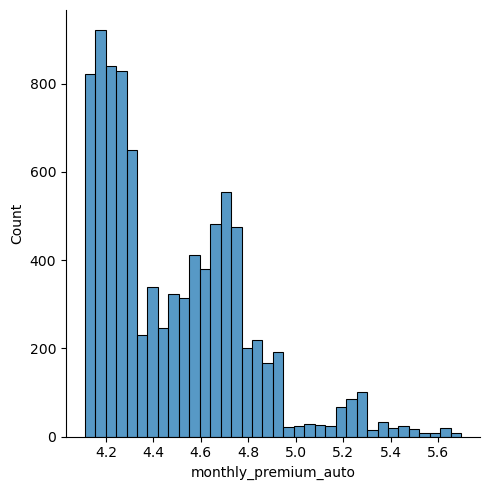

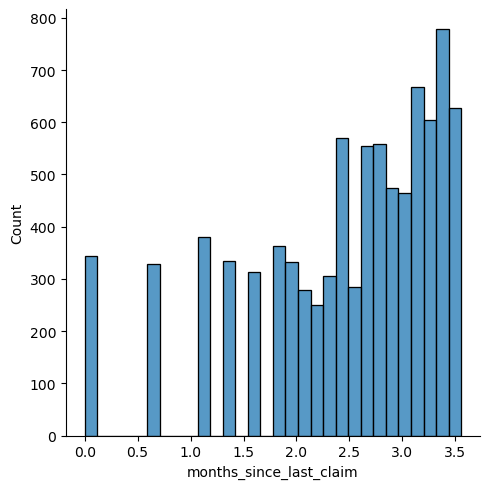

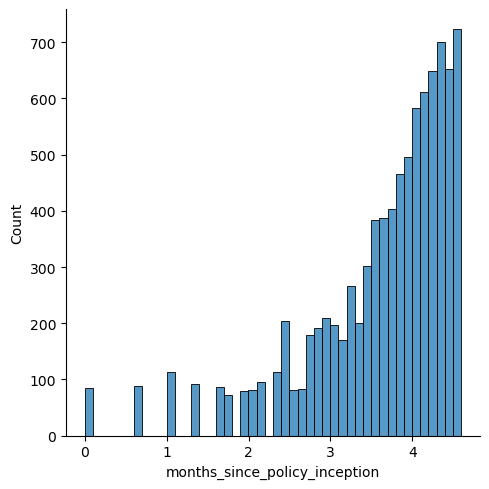

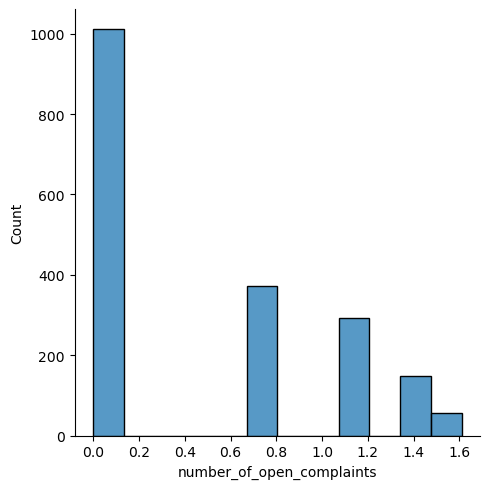

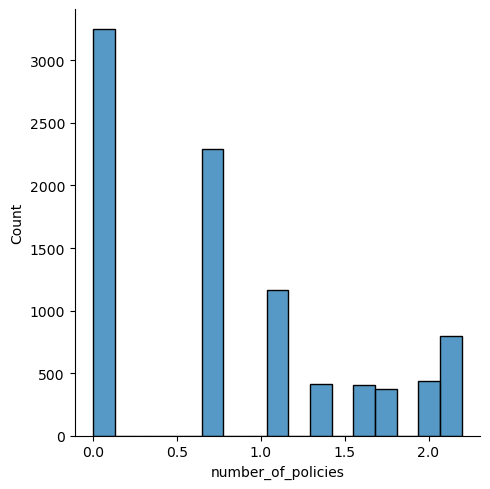

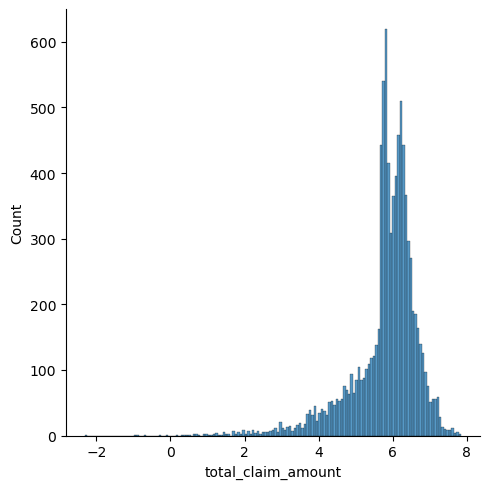

In [4]:
#log transformation:
data_log = np.log(numerical_df)
for columns in data_log.columns:
    sns.displot(data_log[columns])
    plt.show()
#seems to suit customer_lifetime_value

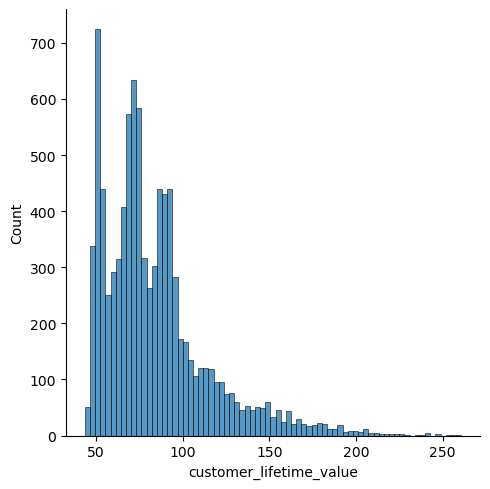

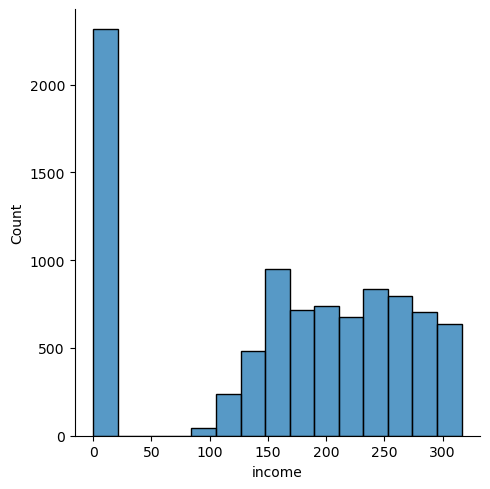

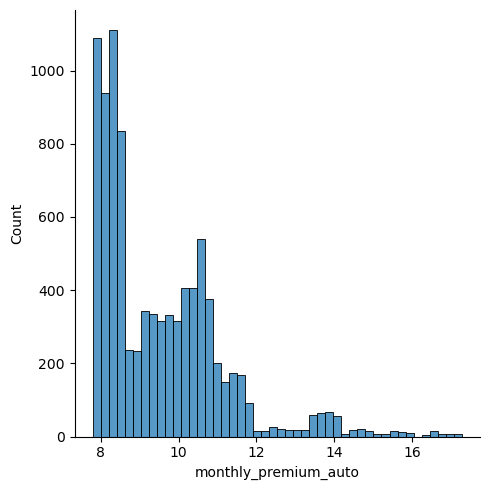

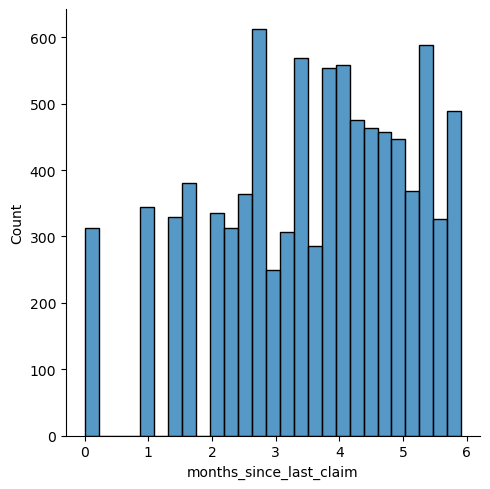

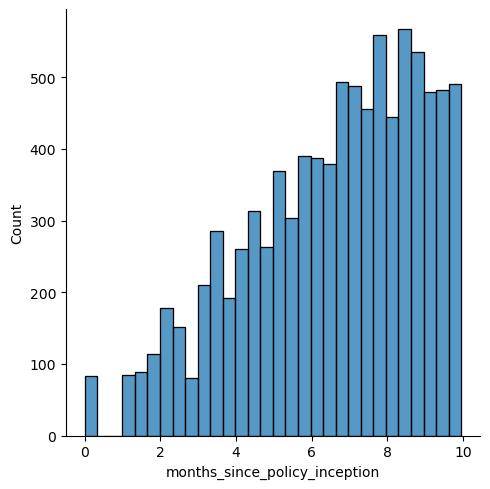

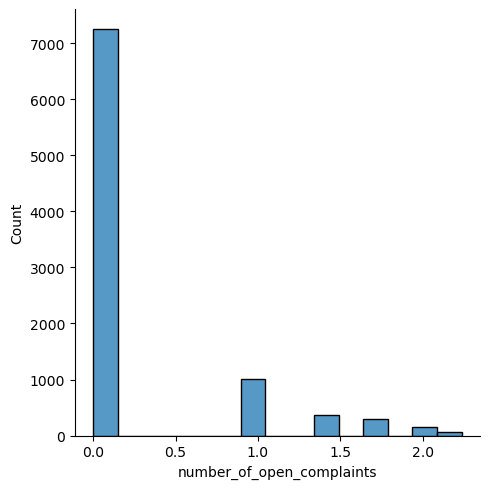

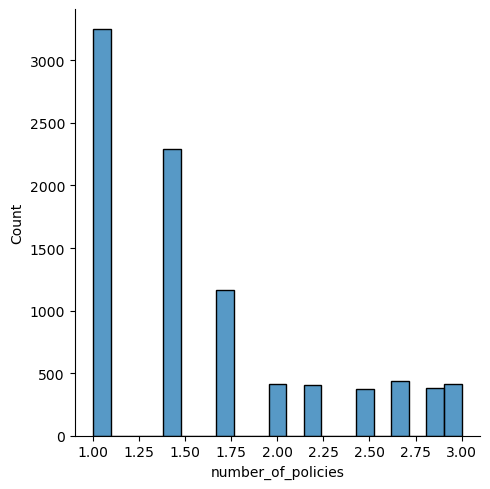

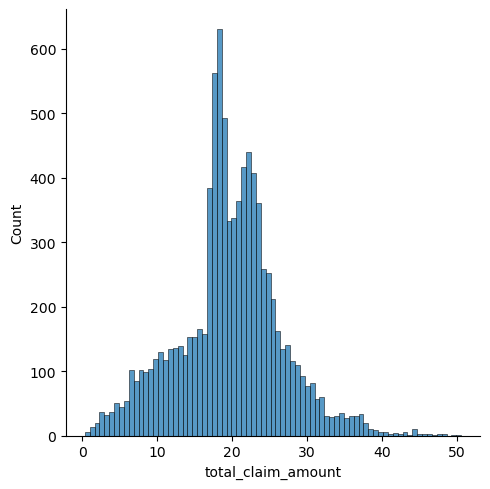

In [5]:
#square root transformation:
data_sqrt = np.sqrt(numerical_df)
for columns in data_sqrt.columns:
    sns.displot(data_sqrt[columns])
    plt.show()
#seems to suit total_claim_amount

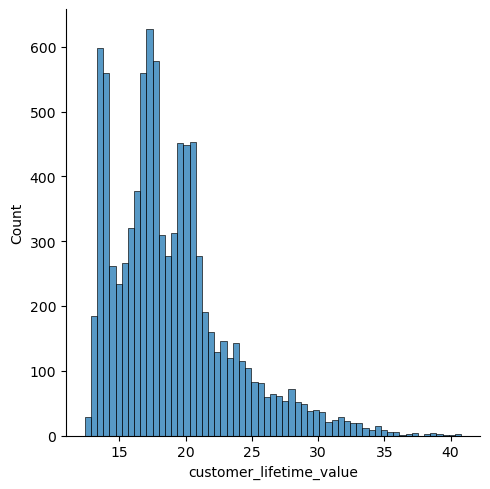

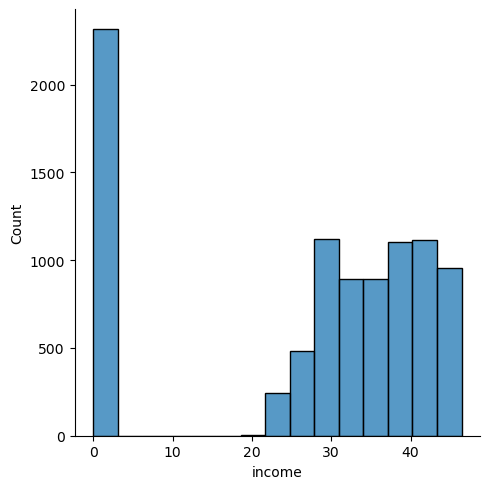

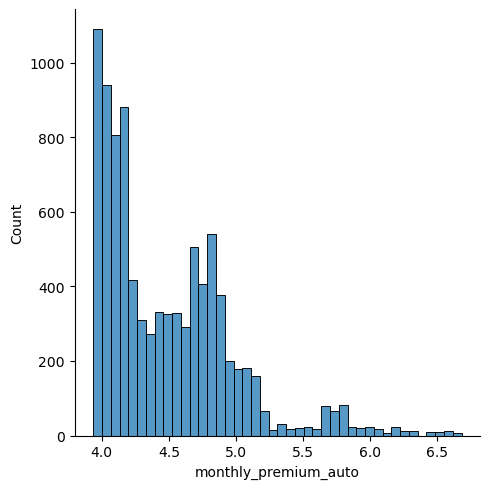

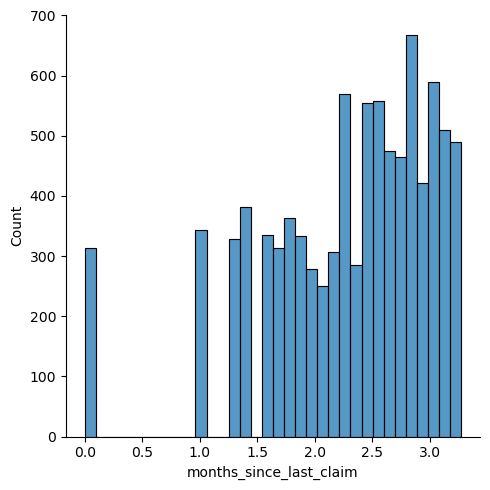

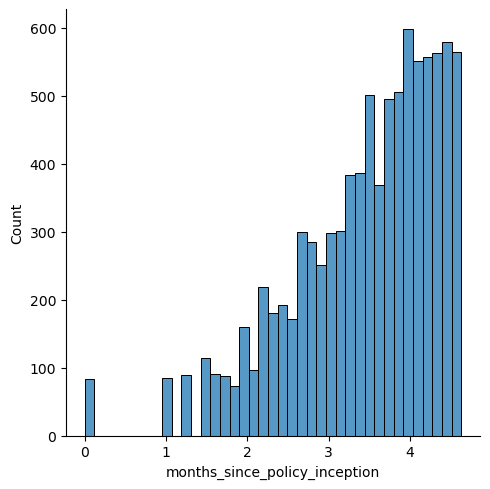

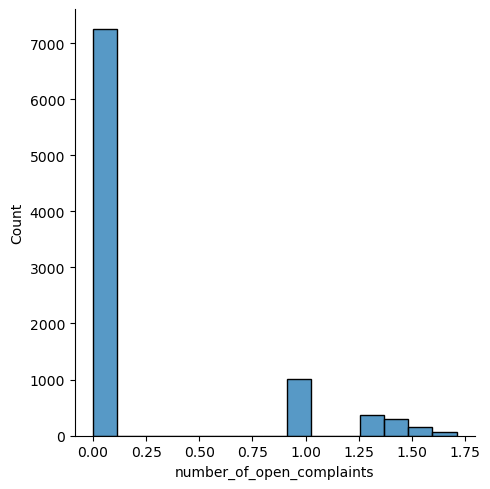

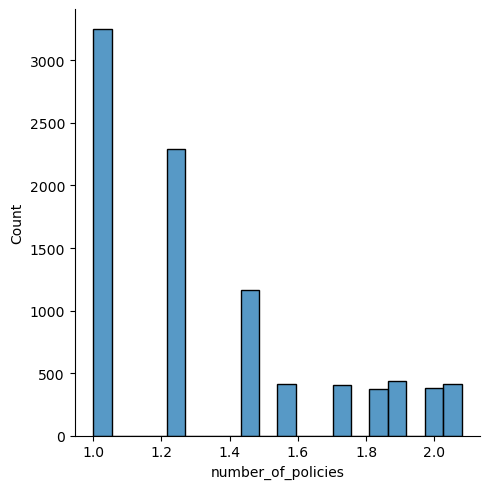

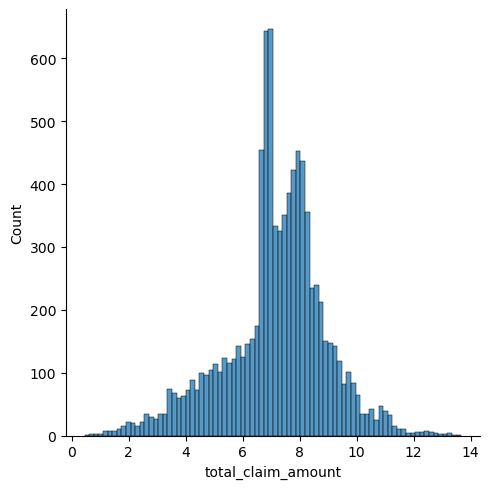

In [6]:
#cube root transformation:
data_cbrt = np.cbrt(numerical_df)
for columns in data_cbrt.columns:
    sns.displot(data_cbrt[columns])
    plt.show()

In [7]:
#there seems to be only 2 variables that are suited to be modelized with a normal distribution after transformation 
#they are 'total_claim_amount' and 'customer_lifetime_value'

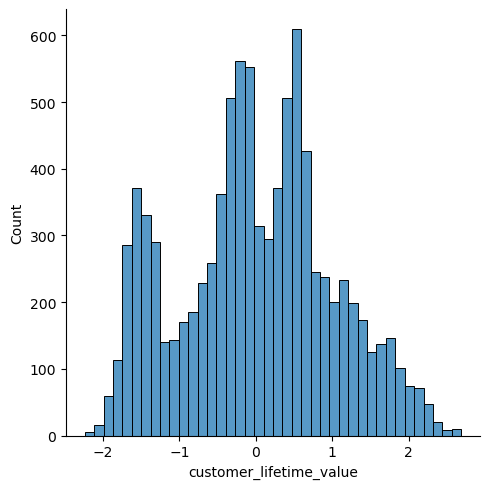

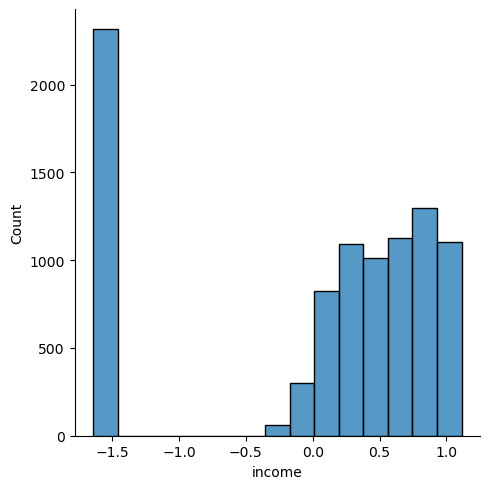

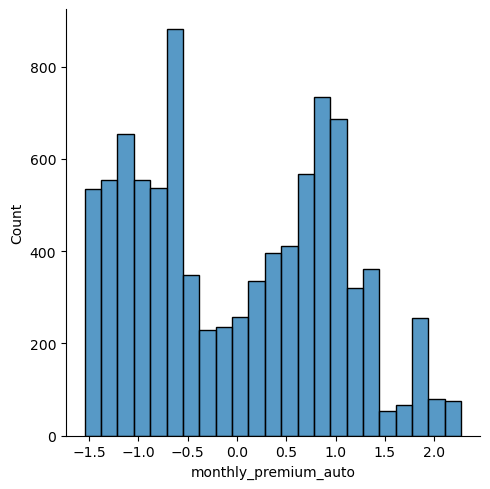

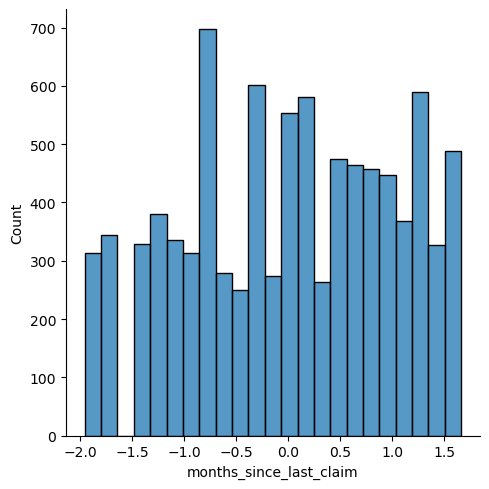

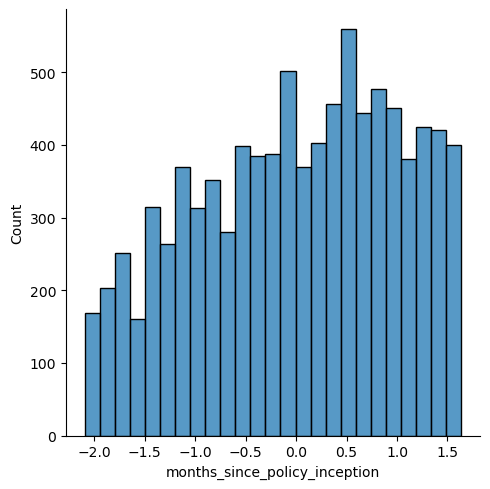

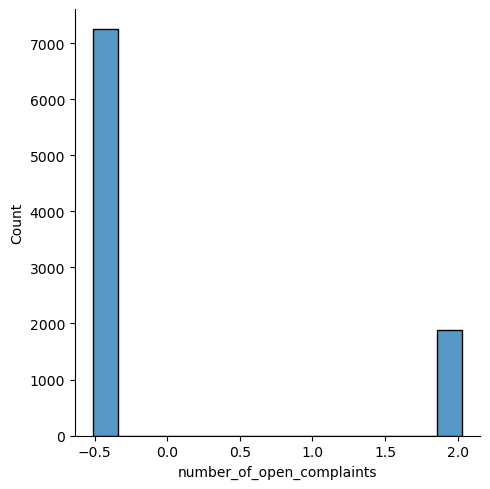

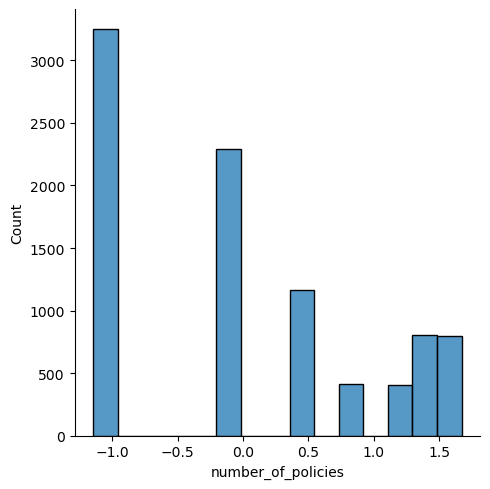

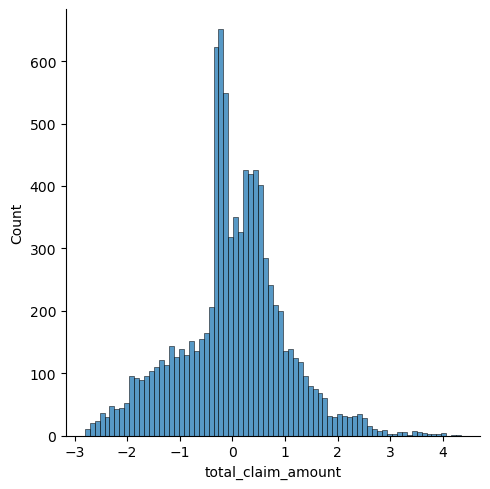

In [8]:
#using a build in function to find the best transformation for each variable

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformer = pt.fit(numerical_df)
transformed = transformer.transform(numerical_df)
data = pd.DataFrame(transformed, columns=numerical_df.columns)
data

for columns in data.columns:
    sns.displot(data[columns])
    plt.show()